Exercise 3 : Stochastic Gradient Learning in Neural Networks

In [200]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
#Libraries

In [201]:
#Question 1 : Implementation of the stochastic gradient descent algorithm

def SGD(x,y,n_max,alpha,w0):

    #We get the total number of points
    n = y.shape[0]
    w = w0

    

    for k in range(1,n_max+1):
        #We set the learning rate
        lr = 1 / (k**alpha)
        #We choose one point at random to estimate the gradient of the function at this point
        i = np.random.randint(0,n)
        
        #We update the parameter
        w = w + 2*lr*(y[i] - np.dot(w,x[i,:]))*x[i,:]
       

    #We return the model with the estimated parameter w
    return w

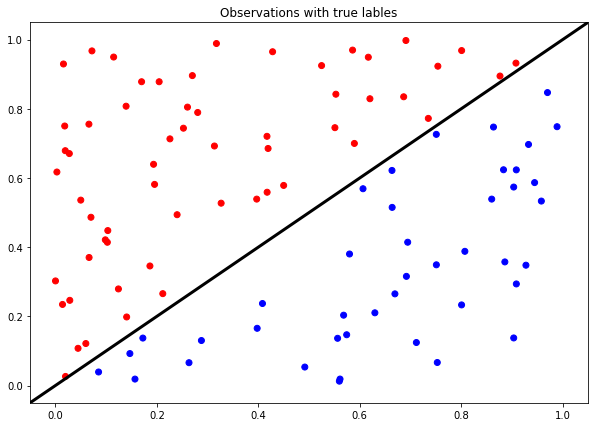

In [135]:
# Question 2 : 
np.random.seed(1)
# We work on a square of size l
l = 1

#We generate n points
n = 100

x = np.random.rand(n, 2) * l

#We define the normal vector of the hyperplane that will be used to assign label y (we normalize it)
w_exact = np.array([-1,1]) / np.sqrt(2)

#slope of the line playing the role of the hyperplane
slope = -w_exact[0]/w_exact[1]

#Assign labels
y = np.sign(np.dot(x,w_exact))

colors = ['blue','red']
color_points = [ colors[int(max(y[i],0))] for i in range(n)]

plt.figure(figsize=(10,7))


#Plot the resulting point
plt.scatter(x[:,0],x[:,1],c=color_points)
#Plot the hyperplane
plt.plot([-1,2],[-slope,2*slope],c="black",linewidth=3)
plt.title("Observations with true lables" )
plt.xlim((-0.05,1.05))
plt.ylim((-0.05,1.05))
plt.show()


The vector w estimated is :  [-1.93461048  1.98428947]
The ratio between the slopes of the two vectors is 1.026


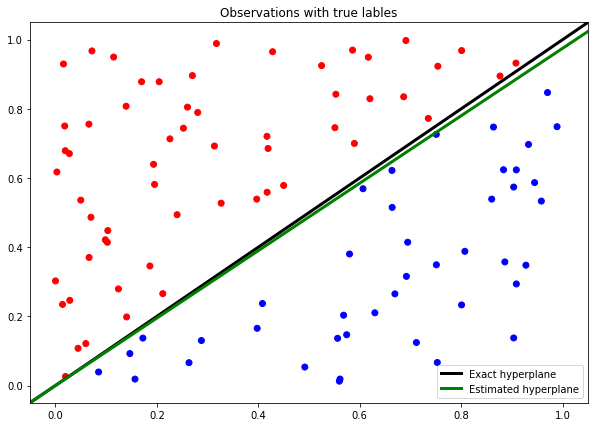

In [136]:
# Question 3

np.random.seed(1)

n_max = 1000

alpha = 0.75

w0 = 2*np.random.rand(2) - 1

w = SGD(x,y,n_max,alpha,w0)

#Vector w estimated
print("The vector w estimated is : " , w)

#Is it far ? We compute the ratio of the slopes between the two vectors
ratio = (w_exact[0]/w_exact[1]) / (w[0]/w[1]) 
print("The ratio between the slopes of the two vectors is %.3f" % ratio)

slope_estimated = -(w[0]/w[1])


#We display the two hyperplanes 

plt.figure(figsize=(10,7))


#Plot the resulting point
plt.scatter(x[:,0],x[:,1],c=color_points)
#Plot the hyperplane
plt.plot([-1,2],[-slope,2*slope],c="black",linewidth=3,label="Exact hyperplane")

#Plot the estimated hyperplane
plt.plot([-1,2],[-slope_estimated,2*slope_estimated],c="green",linewidth=3,label="Estimated hyperplane")

plt.legend(['Exact hyperplane','Estimated hyperplane'])
plt.title("Observations with true lables" )
plt.xlim((-0.05,1.05))
plt.ylim((-0.05,1.05))
plt.show()


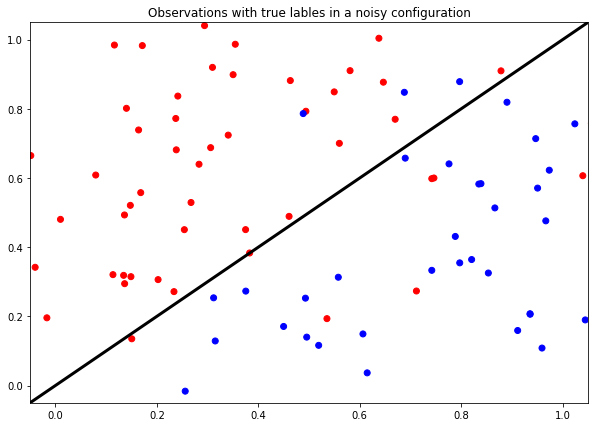

In [137]:
# Question 4, we add gaussian noise

np.random.seed(1)

#standard deviation of the noise
std_noise = 0.2

eps = np.random.normal(0, std_noise, (n,2))

x_noisy = x + eps

#We plot the observations with noise

plt.figure(figsize=(10,7))


#Plot the resulting point
plt.scatter(x_noisy[:,0],x_noisy[:,1],c=color_points)
#Plot the hyperplane
plt.plot([-1,2],[-slope,2*slope],c="black",linewidth=3)
plt.title("Observations with true lables in a noisy configuration" )
plt.xlim((-0.05,1.05))
plt.ylim((-0.05,1.05))
plt.show()



The vector w estimated is :  [-1.45839226  1.61091093]
The ratio between the slopes of the two vectors is 1.105


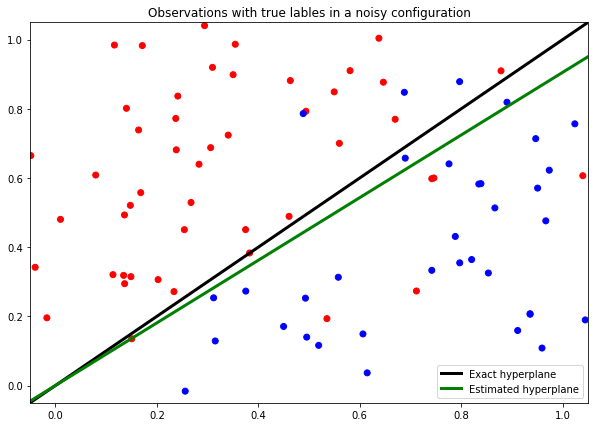

In [138]:
np.random.seed(1)

#We estimate w with our SGD algorithm in this new configuration

w = SGD(x_noisy,y,n_max,alpha,w0)

#Vector w estimated
print("The vector w estimated is : " , w)

#Is it far ? We compute the ratio of the slopes between the two vectors
ratio = (w_exact[0]/w_exact[1]) / (w[0]/w[1]) 
print("The ratio between the slopes of the two vectors is %.3f" % ratio)

slope_estimated = -(w[0]/w[1])

#We display the two hyperplanes 

plt.figure(figsize=(10,7))


#Plot the resulting point
plt.scatter(x_noisy[:,0],x_noisy[:,1],c=color_points)
#Plot the hyperplane
plt.plot([-1,2],[-slope,2*slope],c="black",linewidth=3,label="Exact hyperplane")

#Plot the estimated hyperplane
plt.plot([-1,2],[-slope_estimated,2*slope_estimated],c="green",linewidth=3,label="Estimated hyperplane")

plt.legend(['Exact hyperplane','Estimated hyperplane'])
plt.title("Observations with true lables in a noisy configuration" )
plt.xlim((-0.05,1.05))
plt.ylim((-0.05,1.05))
plt.show()

[]

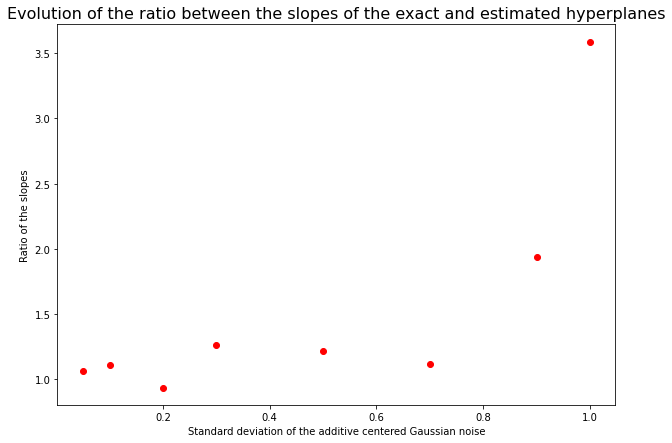

In [139]:
#We look at the evolution of the estimated w for different variance for the gaussian noise

np.random.seed(0)
ratios = []

#standard deviation of the noise
std_noise = np.array([0.05,0.1,0.2,0.3,0.5,0.7,0.9,1])
for noise in std_noise:
    eps = np.random.normal(0, noise, (n,2))
    x_noise = x + eps
    w = SGD(x_noise,y,n_max,alpha,w0)
    ratio = (w_exact[0]/w_exact[1]) / (w[0]/w[1]) 
    ratios.append(ratio)

plt.figure(figsize=(10,7))
plt.scatter(std_noise,ratios,c='red')
plt.title("Evolution of the ratio between the slopes of the exact and estimated hyperplanes",fontsize=16)
plt.xlabel('Standard deviation of the additive centered Gaussian noise')
plt.ylabel('Ratio of the slopes')
plt.plot()


In [237]:
#Question 5 - We test our algorithm on the Breast Cancer Wisconsin (Diagnostic) Data Set 

np.random.seed(10)

# Read the data 
dataframe = pd.read_csv("breast+cancer+wisconsin+diagnostic/wdbc.data",index_col=False,header = None)

dataframe.head()

#We load X and Y
x = dataframe.iloc[:,2:]
y = (dataframe.iloc[:,1] == 'M').astype(int) -  (dataframe.iloc[:,1] == 'B').astype(int)

#We have y_i = 1 if the diagnosis says that it is malignant and y_i = -1 if it is benign

#We create a train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)

#Number of patients
n_train = y_train.shape[0]
n_test = y_test.shape[0]

#Number of features
p = x.shape[1]

#We set the parameters for the algorithm
n_max = 1000
alpha = 0.75
w0 = np.random.normal(0,1,p)



# # Create a StandardScaler instance
# scaler = StandardScaler()

# # Fit the scaler on the training data and transform it
# x_train_normalized = scaler.fit_transform(x_train)

# # Transform the test data using the same scaler
# x_test_normalized = scaler.transform(x_test)

#We normalize data instead of standardisation to prevent w values to increase too much
scaler = Normalizer().fit(x_train)
x_train= scaler.transform(x_train)
x_test = scaler.transform(x_test)


w = SGD(x_train,y_train.to_numpy(),n_max,alpha,w0)

#We normalize w 
w = w / np.linalg.norm(w)

#We make predictions based on our estimated w
y_pred = np.sign(np.dot(x_test,w))

#We compute the accuracy of our predictions
accuracy = (np.sum(y_pred==y_test.to_numpy()) / len(y_pred)) *100

print("We obtain an accuracy for our model of %.3f %%" % accuracy)


We obtain an accuracy for our model of 86.702 %
